# ML Classifiers: KNN Optimizing

### Contents:

**Machine Learning Classifiers:** KNN

**Feature Selection:** Kendalltau

**Resample Method:** Random Over Resampling

```
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.804 total time=17.2min
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.806 total time=16.3min
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.827 total time=16.1min
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.831 total time=16.1min
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.830 total time=16.5min
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.843 total time=16.6min
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.844 total time=15.6min
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.866 total time=15.6min
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=15.4min
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=15.3min
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.772 total time=15.4min
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.773 total time=15.4min
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.789 total time=15.5min
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.792 total time=14.1min
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.791 total time=14.1min
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.830 total time=14.5min
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.831 total time=12.0min
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.854 total time=12.9min
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.859 total time=12.0min
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.858 total time=13.5min
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.751 total time=12.4min
[CV 2/5] END ....n_neighbors=7, weights=uniform;, score=0.753 total time=12.6min
[CV 3/5] END ....n_neighbors=7, weights=uniform;, score=0.765 total time=12.8min
[CV 4/5] END ....n_neighbors=7, weights=uniform;, score=0.767 total time=13.3min
[CV 5/5] END ....n_neighbors=7, weights=uniform;, score=0.767 total time=14.0min
[CV 1/5] END ...n_neighbors=7, weights=distance;, score=0.821 total time=13.8min
[CV 2/5] END ...n_neighbors=7, weights=distance;, score=0.822 total time=12.3min
[CV 3/5] END ...n_neighbors=7, weights=distance;, score=0.845 total time=11.7min
[CV 4/5] END ...n_neighbors=7, weights=distance;, score=0.850 total time=15.6min
[CV 5/5] END ...n_neighbors=7, weights=distance;, score=0.849 total time=15.8min
[CV 1/5] END ....n_neighbors=9, weights=uniform;, score=0.732 total time=13.7min
[CV 2/5] END ....n_neighbors=9, weights=uniform;, score=0.734 total time=14.4min
[CV 3/5] END ....n_neighbors=9, weights=uniform;, score=0.744 total time=15.1min
[CV 4/5] END ....n_neighbors=9, weights=uniform;, score=0.746 total time=15.2min
[CV 5/5] END ....n_neighbors=9, weights=uniform;, score=0.745 total time=14.4min
[CV 1/5] END ...n_neighbors=9, weights=distance;, score=0.816 total time=13.1min
[CV 2/5] END ...n_neighbors=9, weights=distance;, score=0.815 total time=12.9min
[CV 3/5] END ...n_neighbors=9, weights=distance;, score=0.838 total time=12.3min
[CV 4/5] END ...n_neighbors=9, weights=distance;, score=0.844 total time=16.4min
[CV 5/5] END ...n_neighbors=9, weights=distance;, score=0.843 total time=15.8min
```

In [1]:
%%time

# import necessary dependencies
import os
import re
import gc

import time

import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "pastel")

from warnings import simplefilter
simplefilter(action = "ignore", category = FutureWarning)
simplefilter(action = "ignore", category = DeprecationWarning)

# _______________________________________________________________ #

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler, label_binarize

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

CPU times: total: 1.67 s
Wall time: 2.08 s


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
%%time

# config directories
detected_dir = "F:\FURP\#Single Family Loan Level Classification\Sample_orig\Mean-Target_Detected_Samples"

plots_dir = "F:\FURP\#Single Family Loan Level Classification\Sample_orig\Opt_Plots"

# config file paths
detected_paths = os.listdir(detected_dir)

# config necessary global variables
model_name = "KNN+Kendall+Random-Optimized"
kbest = [
    "First Payment Date",
    "Maturity Date",
    "Metropolitan Statistical Area (MSA) Or Metropolitan Division",
    "Mortgage Insurance Percentage (MI %)",
    "Number of Units",
    "Original Combined Loan-to-Value (CLTV)",
    "Original Debt-to-Income (DTI) Ratio",
    "Original UPB",
    "Original Loan-to-Value (LTV)",
    "Original Interest Rate",
    "Postal Code",
    "Original Loan Term",
    "Number of Borrowers",
    "Property Valuation Method",
    "First Payment Year",
    "Maturity Year",
    "Month Gap",
    "First Time Homebuyer Flag_1",
    "First Time Homebuyer Flag_2",
    "First Time Homebuyer Flag_3",
    "Occupancy Status_1",
    "Occupancy Status_2",
    "Occupancy Status_3",
    "Channel_1",
    "Channel_2",
    "Channel_3",
    "Prepayment Penalty Mortgage (PPM) Flag_1",
    "Prepayment Penalty Mortgage (PPM) Flag_2",
    "Prepayment Penalty Mortgage (PPM) Flag_3",
    "Property Type_1",
    "Property Type_2",
    "Property Type_3",
    "Loan Purpose_1",
    "Loan Purpose_2",
    "Loan Purpose_3",
    "Seller Name_1",
    "Seller Name_2",
    "Seller Name_3",
    "Servicer Name_1",
    "Servicer Name_2",
    "Servicer Name_3",
    "Program Indicator_1",
    "Program Indicator_2",
    "Program Indicator_3",
]

CPU times: total: 0 ns
Wall time: 1 ms


In [4]:
%%time

# walk through the files
df = pd.DataFrame()

for fileName in detected_paths:
    temp = pd.read_parquet(os.path.join(detected_dir, fileName))
    df = pd.concat([df, temp])
    del temp
    gc.collect()

# data preprocessing
if kbest is None:
    X = df.drop("Credit Rank", axis = 1)
else:
    X = df[kbest]

Y = df["Credit Rank"]

del df
gc.collect()
X_cols = X.columns

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 42)
del X
del Y
gc.collect()

# apply random oversampling
ros = RandomOverSampler(random_state = 42)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

# apply feature scaling
sc = StandardScaler()
sc_scaler = sc.fit(X_train)
X_train = sc_scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = X_cols)

X_test = sc_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_cols)

CPU times: total: 8.47 s
Wall time: 7.63 s


In [5]:
%%time

# KNN Classifier
knn_clf = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

knn_opt = GridSearchCV(
    knn_clf,
    param_grid,
    scoring = "accuracy",
    verbose = 3
)

knn_opt.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.804 total time=17.2min
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.806 total time=16.3min
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.827 total time=16.1min
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.831 total time=16.1min
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.830 total time=16.5min
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.843 total time=16.6min
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.844 total time=15.6min
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.866 total time=15.6min
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=15.4min
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=15.3min
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.772 total time=15.4min
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [6]:
%%time

print(knn_opt.get_params().keys())
print()
print(knn_opt.best_params_)
print()
print(knn_opt)

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

{'n_neighbors': 3, 'weights': 'distance'}

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)
CPU times: total: 0 ns
Wall time: 1e+03 µs


In [29]:
%%time

keys = [("uniform", 3), ("distance", 3),
        ("uniform", 5), ("distance", 5),
        ("uniform", 7), ("distance", 7),
        ("uniform", 9), ("distance", 9)]

scores = [
    (0.804+0.806+0.827+0.831+0.830) / 5,
    (0.843+0.844+0.866+0.871+0.871) / 5,
    (0.772+0.773+0.789+0.792+0.791) / 5,
    (0.830+0.831+0.854+0.859+0.858) / 5,
    (0.751+0.753+0.765+0.767+0.767) / 5,
    (0.821+0.822+0.845+0.850+0.849) / 5,
    (0.732+0.734+0.744+0.746+0.745) / 5,
    (0.816+0.815+0.838+0.844+0.843) / 5,
]

times = [
    (17.2+16.3+16.1+16.1+16.5) / 5,
    (16.6+15.6+15.6+15.4+15.3) / 5,
    (15.4+15.4+15.5+14.1+14.1) / 5,
    (14.5+12.0+12.9+12.0+13.5) / 5,
    (12.4+12.6+12.8+13.3+14.0) / 5,
    (13.8+12.3+11.7+15.6+15.8) / 5,
    (13.7+14.4+15.1+15.2+14.4) / 5,
    (13.1+12.9+12.3+16.4+15.8) / 5,
]

index = pd.MultiIndex.from_tuples(keys, names=["K Neighbors", "Weights"])

df = pd.DataFrame()

df["Scores"] = pd.Series(scores, index = index)
df["Times"] = pd.Series(times, index = index)

df.info()

df.index

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('uniform', 3) to ('distance', 9)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Scores  8 non-null      float64
 1   Times   8 non-null      float64
dtypes: float64(2)
memory usage: 588.0+ bytes
CPU times: total: 15.6 ms
Wall time: 7 ms


MultiIndex([( 'uniform', 3),
            ('distance', 3),
            ( 'uniform', 5),
            ('distance', 5),
            ( 'uniform', 7),
            ('distance', 7),
            ( 'uniform', 9),
            ('distance', 9)],
           names=['K Neighbors', 'Weights'])

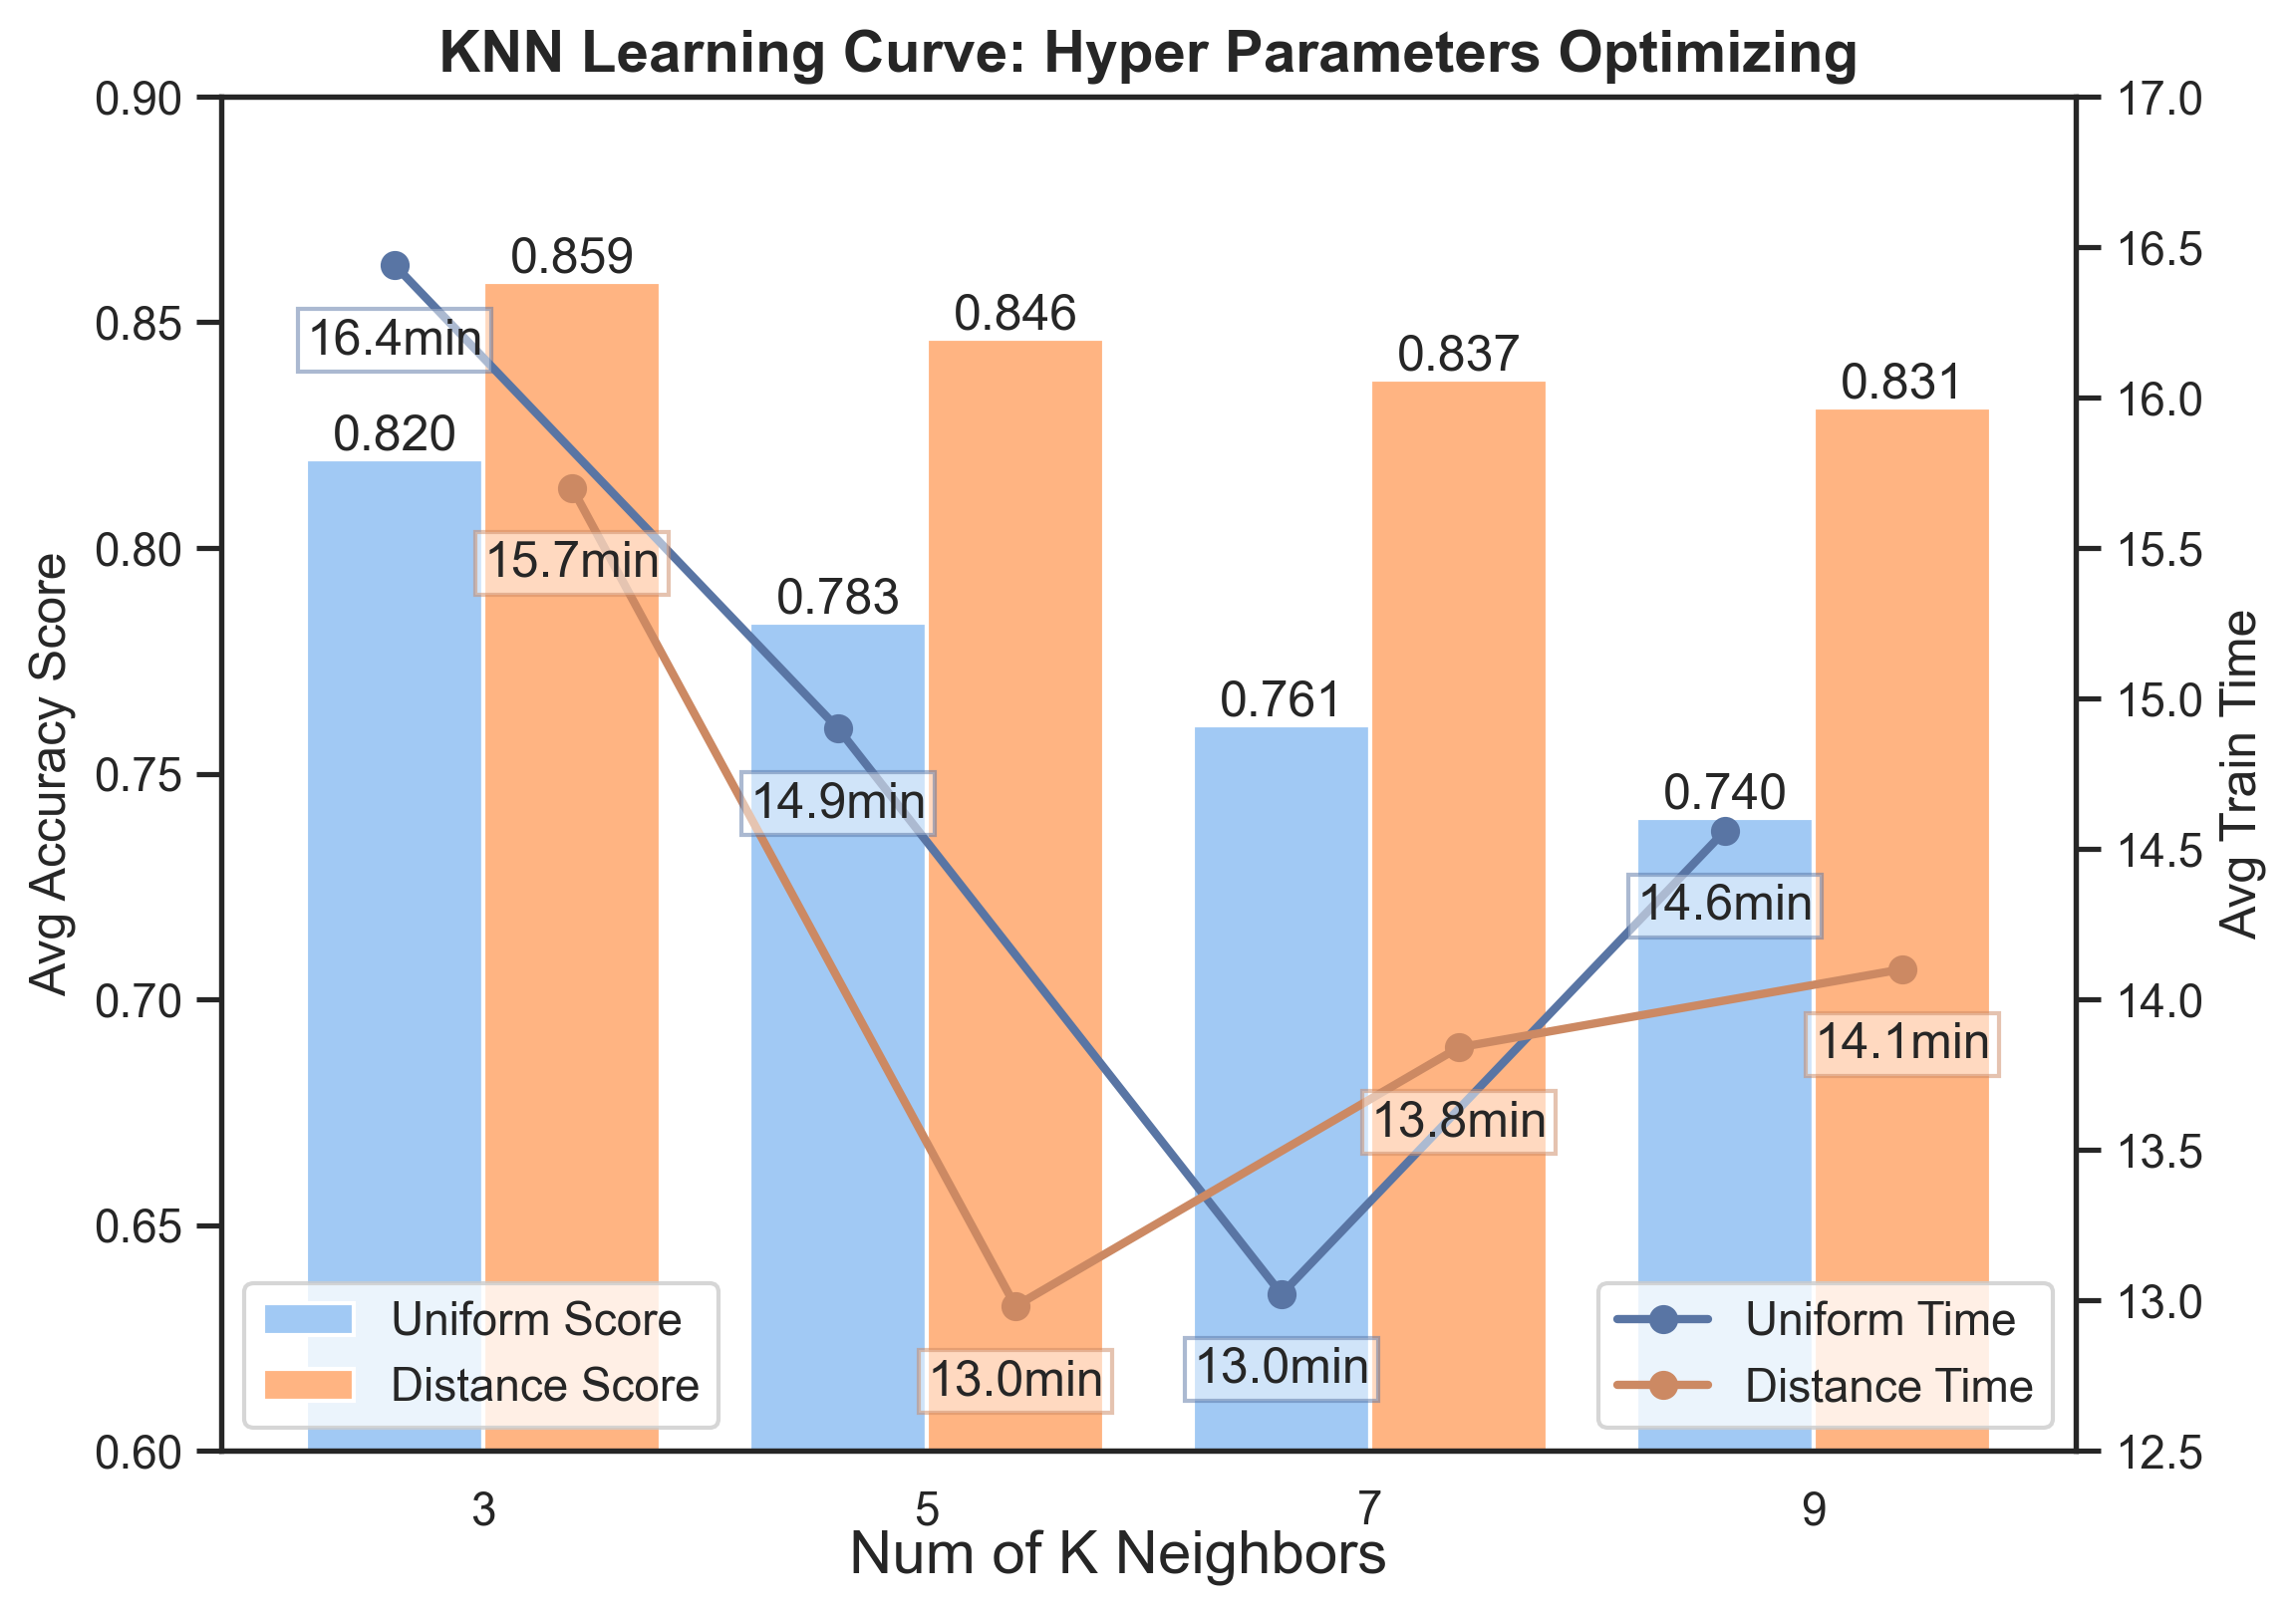

In [243]:
sns.set_theme(style = "white", palette = "pastel")

fig, ax1 = plt.subplots(figsize = (8, 6), dpi = 300)
ax2 = ax1.twinx()

# plot scores
ax1.bar(x = [2.6, 4.6, 6.6, 8.6],
        height = df["Scores"]["uniform"],
        width = 0.8,
        zorder = 1)
ax1.bar(x = [3.4, 5.4, 7.4, 9.4],
        height = df["Scores"]["distance"],
        width = 0.8,
        zorder = 1)
ax1.set_ylim(ymin = 0.6, ymax = 0.9)
ax1.set_ylabel("Avg Accuracy Score")


# plot times
ax2.plot([2.6, 4.6, 6.6, 8.6],
         df["Times"]["uniform"],
         marker = "o",
         linewidth = 2,
         markersize = 6,
         color = "#5975A4",
         zorder = 2)
ax2.plot([3.4, 5.4, 7.4, 9.4],
         df["Times"]["distance"],
         marker = "o",
         linewidth = 2,
         markersize = 6,
         color = "#CC8963",
         zorder = 2)
ax2.set_ylim(ymin = 12.5, ymax = 17)
ax2.set_ylabel(r"Avg Train Time")


# plot texts
for x in [3, 5, 7, 9]:
    ax1.text(x - 0.4,
             df["Scores"]["uniform"][x],
             "%.3f" % (df["Scores"]["uniform"][x]),
             ha = "center",
             va = "bottom",
             zorder = 5)
    ax1.text(x + 0.4,
             df["Scores"]["distance"][x],
             "%.3f" % (df["Scores"]["distance"][x]),
             ha = "center",
             va = "bottom",
             zorder = 5)
    ax2.text(x - 0.4,
             df["Times"]["uniform"][x] - 0.25,
             "%.1f" % df["Times"]["uniform"][x] + "min",
             ha = "center",
             va = "center",
             bbox = {
                 "facecolor": "white",
                 "edgecolor": "#5975A4",
                 "alpha": 0.5,
                 "pad": 2
             },
             zorder = 5)
    ax2.text(x + 0.4,
             df["Times"]["distance"][x] - 0.25,
             "%.1f" % df["Times"]["distance"][x] + "min",
             ha = "center",
             va = "center",
             bbox = {
                 "facecolor": "white",
                 "edgecolor": "#CC8963",
                 "alpha": 0.5,
                 "pad": 2
             },
             zorder = 5)

# plot configuration
ax1.legend(["Uniform Score", "Distance Score"], loc = "lower left")
ax2.legend(["Uniform Time", "Distance Time"], loc = "lower right")

plt.xticks([3, 5, 7, 9])
plt.title(
    "KNN Learning Curve: Hyper Parameters Optimizing",
    fontdict = {
        "size": 14,
        "weight": "bold",
    })
plt.suptitle(
    "Num of K Neighbors",
    y = 0.05,
    ha = "center",
    va = "bottom",
)
plt.savefig("F:\FURP\#Single Family Loan Level Classification\Sample_orig\Opt_Plots\KNN-Opt.png")

In [244]:
%%time
opt_knn_clf = KNeighborsClassifier(n_neighbors = 3, 
                                   weights = "distance")
opt_knn_clf.fit(X_train, Y_train)
model_name = "Opt-KNN+Kendall+Random"

CPU times: total: 1.11 s
Wall time: 1.57 s


In [245]:
%%time

Y_pred = opt_knn_clf.predict(X_test)

print("{} Classifier:".format(model_name))
print("Accuracy Score: {}".format(accuracy_score(Y_test, Y_pred)))
print("Balanced Accuracy Score: {}".format(balanced_accuracy_score(Y_test, Y_pred)))
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Opt-KNN+Kendall+Random Classifier:
Accuracy Score: 0.4882681416630702
Balanced Accuracy Score: 0.33818772673006925
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.08      0.06      2314
           1       0.16      0.26      0.20     16932
           2       0.68      0.52      0.59    146619
           3       0.36      0.50      0.42     61209

    accuracy                           0.49    227074
   macro avg       0.31      0.34      0.32    227074
weighted avg       0.55      0.49      0.51    227074

CPU times: total: 1h 39min 40s
Wall time: 9min


---